In [15]:
from tensorflow import keras
from tf_keras_vis.activation_maximization import ActivationMaximization
import matplotlib.pyplot as plt
import tensorflow as tf

In [16]:
model =  keras.models.load_model('/Users/luizeduardosantos/Documents/Turing/Interpretando-CNNs/model2-files/')

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)               

In [18]:
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.activation_maximization.callbacks import Progress

layer_names = ["conv2d_9","conv2d_10","conv2d_11"]
activations = {}
for layer_name in layer_names:
    n_filters = model.get_layer(layer_name).filters

    extract_intermediate_layer = ExtractIntermediateLayer(index_or_name=layer_name)
    replace2linear = ReplaceToLinear()
    activation_maximization = ActivationMaximization(model,model_modifier=[extract_intermediate_layer, replace2linear],clone=True)
    
    seed_input_shape  = (n_filters, model.input_shape[1], model.input_shape[2],model.input_shape[3])
    seed_input = tf.random.uniform(seed_input_shape, 0, 255)
    scores = CategoricalScore(list(range(n_filters)))
    activations[layer_name] = activation_maximization(scores, seed_input = seed_input, callbacks=[Progress()])


 17/400 [>.............................] - ETA: 39:58 - Score: -3.2318 - TotalVariation2D: 17.7439 - Norm: 32.4218

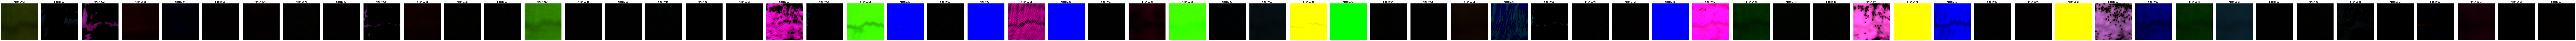

In [ ]:
layer_name = "conv2d_11"
n_filters = model.get_layer(layer_name).filters
f, ax = plt.subplots(nrows=1, ncols=n_filters, figsize=(4*n_filters, 4))
for i, filter_number in enumerate(list(range(n_filters))):
    ax[i].set_title('filter[{:03d}]'.format(filter_number), fontsize=16)
    ax[i].imshow(activations[layer_name][i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()